In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/DS Bootcamp 14-15.05/Uczenie maszynowe - pozostałe elementy/skrypty/dzień 2/dataset/complaints.csv')
df.shape

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2389957, 18)

In [3]:
df = df.sample(30000)

In [4]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10536 entries, 642255 to 779172
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 10536 non-null  object
 1   Product                       10536 non-null  object
 2   Sub-product                   9862 non-null   object
 3   Issue                         10536 non-null  object
 4   Sub-issue                     8408 non-null   object
 5   Consumer complaint narrative  10536 non-null  object
 6   Company public response       5048 non-null   object
 7   Company                       10536 non-null  object
 8   State                         10491 non-null  object
 9   ZIP code                      10486 non-null  object
 10  Tags                          1682 non-null   object
 11  Consumer consent provided?    10536 non-null  object
 12  Submitted via                 10536 non-null  object
 13  Date sent 

zad.1. Dokonaj wstepnej analizy danych i wizualizacji zbioru tak aby wybrac cechy, ktore Twoim zdaniem beda najwazniejsze do procesu budowy algorytmu ML.

In [6]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [7]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [8]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [9]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [10]:
df.head()

,Product,Consumer_complaint_narrative,category_id
642255,"Credit reporting, credit repair services, or o...",I was paying on an account that was not even m...,0
190376,Credit card or prepaid card,I received my American Express statement for t...,1
2116406,Debt collection,I found a credit card on my credit report that...,2
75640,"Credit reporting, credit repair services, or o...",Ive submitted 2 disputes with XXXX regarding ...,0
660540,"Credit reporting, credit repair services, or o...",I need the FRAUD ALERTS removed immediately fr...,0


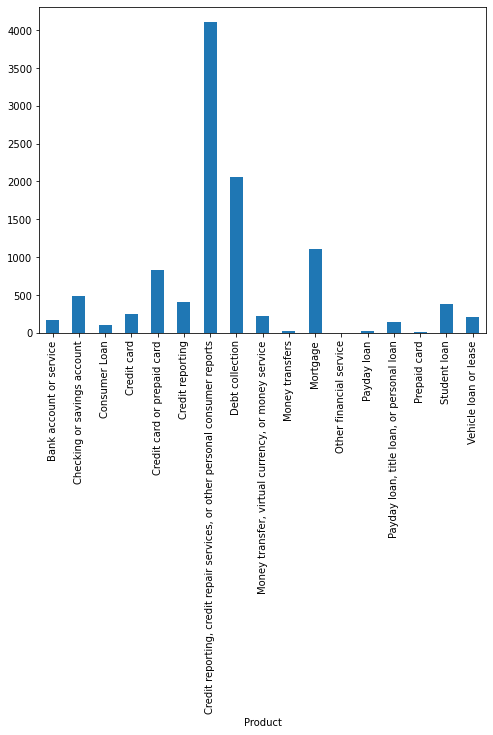

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(10536, 29175)

In [13]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Bank account or service':
  . Most correlated unigrams:
       . overdraft
       . ebay
  . Most correlated bigrams:
       . xxxx overdraft
       . overdraft fees


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Checking or savings account':
  . Most correlated unigrams:
       . branch
       . deposit
  . Most correlated bigrams:
       . savings account
       . checking account


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Consumer Loan':
  . Most correlated unigrams:
       . dealership
       . car
  . Most correlated bigrams:
       . ally bank
       . sell car


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit card':
  . Most correlated unigrams:
       . chase
       . card
  . Most correlated bigrams:
       . american express
       . credit card


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . rewards
       . card
  . Most correlated bigrams:
       . american express
       . credit card


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit reporting':
  . Most correlated unigrams:
       . equifax
       . experian
  . Most correlated bigrams:
       . equifax credit
       . xxxx agencies


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
       . accounts
       . report
  . Most correlated bigrams:
       . identity theft
       . credit report


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Debt collection':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . collection agency
       . collect debt


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
       . paypal
       . coinbase
  . Most correlated bigrams:
       . used paypal
       . coinbase account


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Money transfers':
  . Most correlated unigrams:
       . moneygram
       . western
  . Most correlated bigrams:
       . send money
       . western union


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Mortgage':
  . Most correlated unigrams:
       . modification
       . mortgage
  . Most correlated bigrams:
       . mortgage company
       . loan modification


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Other financial service':
  . Most correlated unigrams:
       . msg
       . unaccounted
  . Most correlated bigrams:
       . originally told
       . loan forgiven


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Payday loan':
  . Most correlated unigrams:
       . payday
       . proposed
  . Most correlated bigrams:
       . big picture
       . picture loans


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Payday loan, title loan, or personal loan':
  . Most correlated unigrams:
       . ace
       . borrowed
  . Most correlated bigrams:
       . pay loan
       . 00 loan


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Prepaid card':
  . Most correlated unigrams:
       . longest
       . prepaid
  . Most correlated bigrams:
       . balance accurate
       . tried use


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Student loan':
  . Most correlated unigrams:
       . loans
       . navient
  . Most correlated bigrams:
       . student loan
       . student loans
# 'Vehicle loan or lease':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . title vehicle
       . gm financial


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [15]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [16]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [17]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id


In [18]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

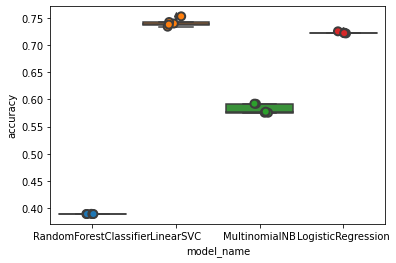

In [20]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [21]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.741173
LogisticRegression        0.722665
MultinomialNB             0.582668
RandomForestClassifier    0.389711
Name: accuracy, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

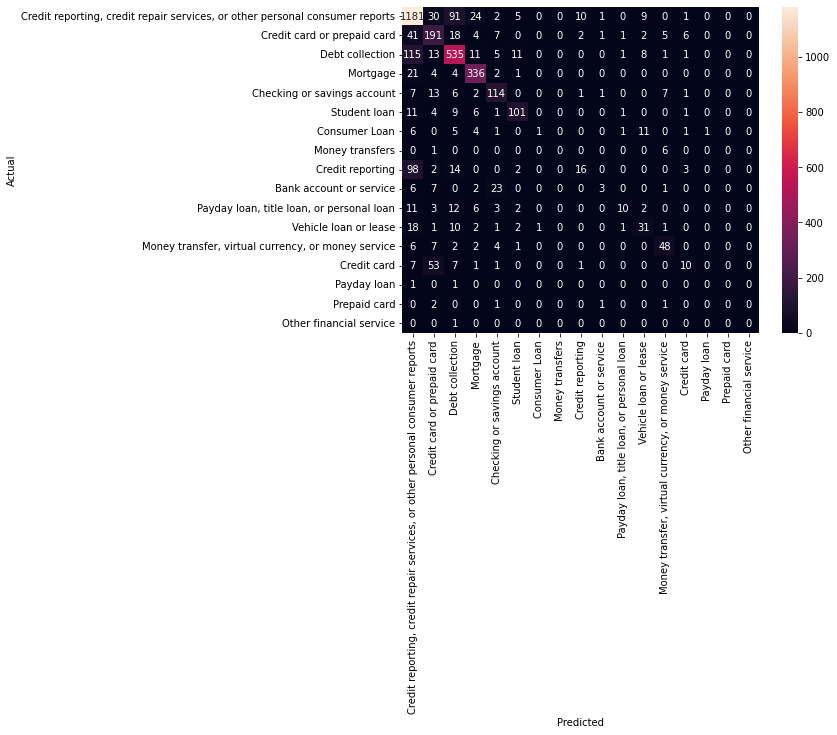

In [23]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 41 examples.


,Product,Consumer_complaint_narrative
1054073,Credit card or prepaid card,The company Kohls department store reported ne...
259712,Credit card or prepaid card,This particular account situation that is late...
8412,Credit card or prepaid card,i had a hard inquiry. I would like to remove t...
257708,Credit card or prepaid card,I have two accounts with Capital one XXXX The ...
2351980,Credit card or prepaid card,I spoke to a representative for Citibank in XX...
455745,Credit card or prepaid card,This particular account situation that is late...
393674,Credit card or prepaid card,Follow up complaint ID XXXX Capitalone reply d...
1343945,Credit card or prepaid card,Midland Funding is reporting inaccurate inform...
1203809,Credit card or prepaid card,I sent several letters to Trans Union about my...
404879,Credit card or prepaid card,Affidavit of Truth Notice to Navy Federal XXXX...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 115 examples.


,Product,Consumer_complaint_narrative
307650,Debt collection,I have been requesting a payoff letter since t...
1940197,Debt collection,I contacted PDQ on Several occasion asking the...
1902405,Debt collection,NCA ACCOUNT NUMBERs : XXXX XX/XX/XXXX Address ...
1223114,Debt collection,This account was unauthorized. I am a victim o...
194200,Debt collection,My credit report has accounts reporting that s...
...,...,...
2024921,Debt collection,My credit has been unduly affected due to an a...
8132,Debt collection,I had become XXXX XXXX and sick with XXXX. I ...
2007731,Debt collection,I disputed this account with Commonwealth Fina...
2343715,Debt collection,I was living with a friend and moved out on XX...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 21 examples.


,Product,Consumer_complaint_narrative
541870,Mortgage,Mr. Cooper has charged me a {$10.00} fee on my...
319735,Mortgage,My home mortgage was transferred effective XX/...
1414892,Mortgage,"XXXX XXXX XXXX, Notice to quit and demand for ..."
1972639,Mortgage,"In XXXX 2009, my wife and I declared Chapter X..."
207267,Mortgage,I got an email from XXXX XXXX soliciting about...
9850,Mortgage,I had an impound account with XXXX XXXX. In XX...
2159727,Mortgage,I have a loan with NSTAR/COOPER. I have always...
1542554,Mortgage,"I sent a letter to XXXX XXXX XXXX, XXXX regard..."
1221738,Mortgage,I recieved some deed of ownership from XXXX XX...
2239446,Mortgage,Fifth Third Bank incorrectly listed my second ...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 7 examples.


,Product,Consumer_complaint_narrative
789261,Checking or savings account,America First Federal Credit Union switched me...
2383373,Checking or savings account,"Hello XXXX XXXX, Im a victim of fraud and Incl..."
146854,Checking or savings account,When I completed Vio Bank 's online applicatio...
2256038,Checking or savings account,"Dates, XX/XX/16 to XX/XX/16. Bank employees XX..."
1359184,Checking or savings account,The way this bank clears transactions is extre...
85889,Checking or savings account,I called XX/XX/21 to get an update regarding m...
1030768,Checking or savings account,"Last night, on XXXX, XX/XX/XXXX. Somebody hack..."



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 11 examples.


,Product,Consumer_complaint_narrative
2015844,Student loan,I have a student loan owed to ACS ( XXXX XXXX ...
599022,Student loan,Navient is not applying payments that are made...
186495,Student loan,Y years ago I was contacted by nelnet my lende...
79979,Student loan,I have been reaching out to Sallie Mae for ove...
2023854,Student loan,This is a followup to my complaint against Nav...
2238642,Student loan,I was notified in late XXXX for the first time...
2267955,Student loan,ada.gov Americans with Disabilities Act Discri...
1577499,Student loan,Due to confusing communications from two of XX...
701943,Student loan,I was shocked when I reviewed my credit report...
2143374,Student loan,"XX/XX/XXXX, I requested a student loan consoli..."



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
1917459,Consumer Loan,XXXX 2012 we charged The Home Depot card for k...
1930428,Consumer Loan,"I purchased a vehicle, after a while it starte..."
909507,Consumer Loan,"I had a loan with the local "" TOWER LOAN '' ..."
2031103,Consumer Loan,"While trying to reset my password, the website..."
1423216,Consumer Loan,I was lied to about the credit check process
1289121,Consumer Loan,I called Nissan XXXX to make payment I request...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 98 examples.


,Product,Consumer_complaint_narrative
1915058,Credit reporting,I had an account listed on my credit report as...
1903460,Credit reporting,I am writing to dispute the disposition of the...
1972003,Credit reporting,XXXX SOC SEC # XXXX DOB XX/XX/XXXX ADDRESS XXX...
451975,Credit reporting,I am a victim of identity theft. I have been a...
2025022,Credit reporting,The investigation of my discharged bankruptcy ...
...,...,...
2012086,Credit reporting,Someone opened a credit card under my account ...
1397510,Credit reporting,I have been the victim of identity theft fraud...
2024978,Credit reporting,I filed a complaint stating that the Public Re...
1908549,Credit reporting,I am in the process of trying to get a mortgag...



'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
1979493,Bank account or service,There is an account with Pioneer/XXXX XXXX XXX...
1979794,Bank account or service,"HELLO, MY name is XXXX XXXX XXXXI live in Mass..."
1933556,Bank account or service,I have recently checked my consumer credit rep...
1939588,Bank account or service,"Dear Sir/Madam, I am writing to express my con..."
1994502,Bank account or service,US Bank is reporting false information on my c...
1916469,Bank account or service,Account that I never over drafted to my knowle...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 11 examples.


,Product,Consumer_complaint_narrative
2271786,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I contacted Mariner Finance via ...
2133911,"Payday loan, title loan, or personal loan",In XX/XX/XXXX-XX/XX/XXXX I entered into an agr...
1072425,"Payday loan, title loan, or personal loan","I went to XXXX XXXX XXXX XXXX XXXX XXXX, MO XX..."
978138,"Payday loan, title loan, or personal loan",XXXX XXXX XXXX sold my loan to SST and I was n...
246561,"Payday loan, title loan, or personal loan",Me and my husband took this loan out to pay fo...
251550,"Payday loan, title loan, or personal loan",Got a small installment loans. They raised the...
305890,"Payday loan, title loan, or personal loan",It all started with a credit repair agency by ...
2071526,"Payday loan, title loan, or personal loan",Im trying to apply for loan and the rep refuse...
442848,"Payday loan, title loan, or personal loan",Received a letter from Golden Valley lending o...
2117550,"Payday loan, title loan, or personal loan",An unauthorized account was opened in mine nam...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 18 examples.


,Product,Consumer_complaint_narrative
2210097,Vehicle loan or lease,Around XX/XX/XXXX I purchased a XXXX XXXX XXXX...
509921,Vehicle loan or lease,My down payment was not included in the financ...
2298969,Vehicle loan or lease,On XXXX my wife totaled her car. My insurance ...
2165069,Vehicle loan or lease,Gm Financial failed to report to the credit bu...
340506,Vehicle loan or lease,I have two leases with XXXX XXXX ( NMAC ). I h...
169393,Vehicle loan or lease,"I have a loan with HELM ASSOCS. Another thing,..."
1247215,Vehicle loan or lease,I had filed a complaint with cfpb on a account...
781316,Vehicle loan or lease,I purchased a vehicle and was financed by XXXX...
33843,Vehicle loan or lease,I contacted BMW Financial Services about the l...
751183,Vehicle loan or lease,I recently looked at my credit reports and not...



'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
2122017,"Money transfer, virtual currency, or money ser...",I requested a funds transfer from Amex bank to...
124652,"Money transfer, virtual currency, or money ser...",My Reports A mess and there credit companies s...
1135272,"Money transfer, virtual currency, or money ser...",I got a call introducing herself as an employe...
2015101,"Money transfer, virtual currency, or money ser...",On XX/XX/21 I was the victim of a fraudulent V...
819353,"Money transfer, virtual currency, or money ser...",Im trying to use the XXXX app on my phone and ...
859439,"Money transfer, virtual currency, or money ser...",I received a check from CFPB and its outdated....



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 7 examples.


,Product,Consumer_complaint_narrative
1992544,Credit card,There a XXXX fraudulent credit cards that were...
1972599,Credit card,I have a credit card with continental finance ...
2026958,Credit card,"Fraudulent charge on account, was reported, no..."
1984173,Credit card,"I wrote a letter to Capital One on XXXX XXXX, ..."
1901420,Credit card,I would like CFPB to continue pursuing this ca...
1918485,Credit card,"I recently learned that without my agreement, ..."
1006048,Credit card,Had to call 3 times to get my account closed.



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 30 examples.


,Product,Consumer_complaint_narrative
1176200,"Credit reporting, credit repair services, or o...",XX/XX/2021 Dear Consumer Federal Protection Bu...
801622,"Credit reporting, credit repair services, or o...",XXXX XXXX pulled my credit due to being denied...
1136241,"Credit reporting, credit repair services, or o...",This acct was a secured XXXX XXXX card and the...
2195829,"Credit reporting, credit repair services, or o...",There seems to be an American Express account ...
651030,"Credit reporting, credit repair services, or o...",I contacted US bank as they are not reporting ...
872972,"Credit reporting, credit repair services, or o...",I did apply on several companys for credit but...
2060574,"Credit reporting, credit repair services, or o...",XXXX XXXX bank and XXXX XXXX XXXX XXXX gave me...
364936,"Credit reporting, credit repair services, or o...",I called Experian about how to go about taking...
607828,"Credit reporting, credit repair services, or o...","On XX/XX/XXXX, I closed my credit card account..."
325811,"Credit reporting, credit repair services, or o...",I made a payment on XX/XX/2020 to my Chase Fre...



'Debt collection' predicted as 'Credit card or prepaid card' : 13 examples.


,Product,Consumer_complaint_narrative
1973015,Debt collection,In XXXX of 2012 my identification mainly my so...
463151,Debt collection,See XX/XX/XXXX USAA CREDIT CARD FRAUD CLAIM da...
98870,Debt collection,XXXX is charging me for a service i have not ...
208957,Debt collection,I have or had a Sychrony Home credit card. Whe...
196895,Debt collection,I have been receiving credit card past due sta...
636478,Debt collection,I have disputed this account and have reached ...
251680,Debt collection,Out of the blue I started receiving calls from...
224258,Debt collection,I have been battling XXXX for 2 years while ca...
1462762,Debt collection,This is in rebuttal to response from original ...
2029208,Debt collection,I paid this charge in a XXXX store when closin...



'Checking or savings account' predicted as 'Credit card or prepaid card' : 13 examples.


,Product,Consumer_complaint_narrative
678774,Checking or savings account,I am an international Bank of America customer...
2302098,Checking or savings account,I receive a letter today ( XXXX XX/XX/2018 ) d...
589123,Checking or savings account,"XX/XX/2020,,, Cont,, Issues,, Not Fixed Yet,,!..."
168121,Checking or savings account,I received an email on XX/XX/XXXX and a letter...
1333839,Checking or savings account,"Use Citibank bill pay to pay rent each month, ..."
327319,Checking or savings account,"I received a letter last week, regarding a dis..."
2062518,Checking or savings account,"On XX/XX/XXXX, my account with BBVA was locked..."
850034,Checking or savings account,On XX/XX/XXXX my Freedom Unlimited credit card...
319694,Checking or savings account,On XXXX I made a reservation through XXXX with...
2129926,Checking or savings account,Wells Fargo bank has again on the 7th time or ...



'Bank account or service' predicted as 'Credit card or prepaid card' : 7 examples.


,Product,Consumer_complaint_narrative
1905320,Bank account or service,American Express XXXX XXXX XXXX Account online...
1957489,Bank account or service,I accidently sent Chase Card Service 2-payment...
1997181,Bank account or service,I used a balance transfer check ( Hardcopy ) b...
1994882,Bank account or service,"In early XXXX, i applied and was approved for ..."
1921296,Bank account or service,i had filed a debit card dispute regarding a c...
1891410,Bank account or service,I enrolled in a Citibank checking account in X...
1924981,Bank account or service,"XXXX, Ca. XXXX XXXX station. I attempted to ta..."



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 7 examples.


,Product,Consumer_complaint_narrative
564817,"Money transfer, virtual currency, or money ser...","On XX/XX/2020, I used Cash App to pay a down p..."
1336947,"Money transfer, virtual currency, or money ser...","On XX/XX/2020, an account was fraudulently ope..."
1379155,"Money transfer, virtual currency, or money ser...",XX/XX/2021 I opened a activated my account wit...
1188102,"Money transfer, virtual currency, or money ser...","as of today, XX/XX/2021 at XXXX, my cashapp ac..."
2234683,"Money transfer, virtual currency, or money ser...",For the second time this year Paypal allowed a...
711735,"Money transfer, virtual currency, or money ser...",The account was opened on XX/XX/XXXX and nev...
2160742,"Money transfer, virtual currency, or money ser...",My wallet was stolen from the XXXX at XXXX XXX...



'Credit card' predicted as 'Credit card or prepaid card' : 53 examples.


,Product,Consumer_complaint_narrative
1931901,Credit card,i have a credit card account with citi bank si...
1917403,Credit card,I was enrolled without my knowledge or consent...
1925179,Credit card,I was making payments to Wells Fargo for a sto...
1965935,Credit card,BofA Closed my credit cards account. They rece...
2013553,Credit card,"In XX/XX/XXXX, I got a new cc from AAA ; it wa..."
1905481,Credit card,I have a promotional credit card with Home Dep...
1054190,Credit card,I was sold a defective luggage bag by XXXX on ...
2266021,Credit card,Purchased goods and services from Lowe 's usin...
2007295,Credit card,I HAVE A COMPLAINT WITH WELLS FARGO ( XXXX XXX...
2042272,Credit card,Yesterday I received my credit card bill for l...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 91 examples.


,Product,Consumer_complaint_narrative
941722,"Credit reporting, credit repair services, or o...",I received an alert on my credit report from P...
490895,"Credit reporting, credit repair services, or o...",The collision asset account is not mines I hav...
399074,"Credit reporting, credit repair services, or o...",On XXXX I sent this company a debt validation ...
485168,"Credit reporting, credit repair services, or o...",During the height of the pandemic in XXXX of 2...
2351527,"Credit reporting, credit repair services, or o...",I had an account placed for collections with a...
...,...,...
226867,"Credit reporting, credit repair services, or o...",On XX/XX/19 California Account Services locate...
704969,"Credit reporting, credit repair services, or o...",XXXX XXXX ACCT # XXXXXXXX is trying to collect...
693314,"Credit reporting, credit repair services, or o...",In2018Iopenedapaypalaccount.MyemailaddressisXX...
716254,"Credit reporting, credit repair services, or o...",I have an unverified account from XXXX. I had ...



'Credit card or prepaid card' predicted as 'Debt collection' : 18 examples.


,Product,Consumer_complaint_narrative
314459,Credit card or prepaid card,I have taken notes of dates and names and ever...
1309698,Credit card or prepaid card,In the later part of XX/XX/XXXX I received a c...
897985,Credit card or prepaid card,Date : XX/XX/2018 Minimum amount due : {$49.00...
110361,Credit card or prepaid card,XX/XX/2021 I contacted Comenity Bank and propo...
2339794,Credit card or prepaid card,On XXXX XXXX I entered into a payoff agreement...
1463641,Credit card or prepaid card,"On XX/XX/XXXX ( Friday ), XXXX XXXX XXXX XXXX ..."
263708,Credit card or prepaid card,This account doesnt belong to me I already dis...
545138,Credit card or prepaid card,On XX/XX/2020 I received a text from the pharm...
2290752,Credit card or prepaid card,XX/XX/18 I attempted to log into my Kohl 's ch...
2297265,Credit card or prepaid card,I XXXX XXXX set up a long term hardship progra...



'Checking or savings account' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
2128971,Checking or savings account,on a previous complaint regarding the same acc...
2364059,Checking or savings account,My account got suspended on the XXXX of XXXX. ...
2173001,Checking or savings account,I am receiving mail from Bank of America in XX...
733752,Checking or savings account,This is exploitation of the poor and XXXX with...
265708,Checking or savings account,"In XXXX, my wife and I migrated to overseas. W..."
465932,Checking or savings account,On or about XX/XX/15 I transferred {$250.00} i...



'Student loan' predicted as 'Debt collection' : 9 examples.


,Product,Consumer_complaint_narrative
2313336,Student loan,this institution as permanently closed due fal...
1351815,Student loan,"I am on an income based repayment plan, I paid..."
9385,Student loan,"In XXXX of XXXX, I setup a monthly auto paymen..."
2017481,Student loan,"On XXXX XXXX, XXXX, I received my first and on..."
2175935,Student loan,I have received multiple calls and voicemails ...
183385,Student loan,I took out several small student loans with Di...
1932359,Student loan,"In XXXX XXXX, my XXXX tax refund was offset by..."
110015,Student loan,Performant Recovery Inc contact me to apply fo...
1878426,Student loan,The payment optionms is to expensive when aski...



'Credit reporting' predicted as 'Debt collection' : 14 examples.


,Product,Consumer_complaint_narrative
1931703,Credit reporting,I saw on my report that they have an address f...
1923689,Credit reporting,XXXX/XXXX/16 XXXX XXXX XXXX XXXX XXXX XXXX XXX...
1975637,Credit reporting,I got an email with a credit report alert. I l...
2011153,Credit reporting,XXXX/XXXX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX X...
1999569,Credit reporting,XXXX Is reporting that my account is open and ...
2011720,Credit reporting,"On XXXX, 2016 I received a letter from XXXX XX..."
1907387,Credit reporting,I have settled with XXXX XXXX XXXX over 5 year...
2024801,Credit reporting,I had a payday loan with XXXX XXXX in XXXX of ...
1993461,Credit reporting,There are multiple debts form XXXX collection ...
1907253,Credit reporting,I relocated to the XXXX area for work and rent...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 12 examples.


,Product,Consumer_complaint_narrative
73828,"Payday loan, title loan, or personal loan",I have tried to pay off this loan that is ruin...
2207970,"Payday loan, title loan, or personal loan",A full payment was made but I only wanted the ...
1071363,"Payday loan, title loan, or personal loan","In XX/XX/XXXX, I had borrowed up to {$800.00} ..."
155270,"Payday loan, title loan, or personal loan","Requesting any refunds do on my loan, per the ..."
1311861,"Payday loan, title loan, or personal loan",We have a loan for a vehicle that we have been...
400724,"Payday loan, title loan, or personal loan",I was involved with a payday loan from ace cas...
785687,"Payday loan, title loan, or personal loan","Hi, I am filing this complaint because the exe..."
2077122,"Payday loan, title loan, or personal loan",I got a call from a company called Asset Recov...
14988,"Payday loan, title loan, or personal loan",I got this pay day loan 2 years ago.I don't re...
812744,"Payday loan, title loan, or personal loan",Subject : XXXX XXXX XXXX subsidiary Inbox Loan...



'Vehicle loan or lease' predicted as 'Debt collection' : 10 examples.


,Product,Consumer_complaint_narrative
250935,Vehicle loan or lease,I was affected by XXXX I was in the hospital ...
1182674,Vehicle loan or lease,I have contacted the creditor/company many tim...
457310,Vehicle loan or lease,My husband and I purchased a XXXX XXXX XXXX XX...
1057745,Vehicle loan or lease,Was told by santander not to do anything until...
929651,Vehicle loan or lease,unknown debt
418890,Vehicle loan or lease,I have sent the rescission letter to Mercedes ...
1136226,Vehicle loan or lease,In XXXX 2016 I received a bill from Toyota Fin...
697039,Vehicle loan or lease,I leased a XXXX XXXX XXXX. This is our XXXX XX...
61599,Vehicle loan or lease,"I turned in my XXXX XXXX, and Ford Motor put a..."
2256164,Vehicle loan or lease,My daughter purchased a XXXX XXXX earlier this...



'Credit card' predicted as 'Debt collection' : 7 examples.


,Product,Consumer_complaint_narrative
1990568,Credit card,American Express turned us over to collection ...
1905079,Credit card,"I was involved in an accident ( on XXXX XXXX, ..."
1945498,Credit card,I have a dispute with a local towing company. ...
1983010,Credit card,I have contacted Chase to validate a debt that...
1915931,Credit card,Midland Funding # XXXX The creditor did obtain...
1892820,Credit card,Capital One closed my account because activity...
1920576,Credit card,I am a military personnel on active duty and I...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 24 examples.


,Product,Consumer_complaint_narrative
615651,"Credit reporting, credit repair services, or o...",They have continued to report the wrong balanc...
926943,"Credit reporting, credit repair services, or o...","For 2 years now, XXXX XXXX have bought m..."
569131,"Credit reporting, credit repair services, or o...",PHH Mortgage Services formerly OCWEN Loan Serv...
134184,"Credit reporting, credit repair services, or o...",I just received the most disappointing respons...
739090,"Credit reporting, credit repair services, or o...","On XXXX XXXX, 2015 I sold my condo under a sho..."
123249,"Credit reporting, credit repair services, or o...",I was shocked when I reviewed my credit report...
710104,"Credit reporting, credit repair services, or o...",CFPB Complaint - XXXX - XXXX XXXX- XXXX XXXX X...
819325,"Credit reporting, credit repair services, or o...",These are not my accounts. This is a second re...
815857,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX finally corrected my XXXX repo...
1565926,"Credit reporting, credit repair services, or o...",My wife and I had a home equity line of credit...



'Debt collection' predicted as 'Mortgage' : 11 examples.


,Product,Consumer_complaint_narrative
127713,Debt collection,XX/XX/XXXX My complaint concerns two issues wi...
322757,Debt collection,I received a withdrawal letter dated XX/XX/201...
145953,Debt collection,I enrolled with XXXX XXXX XXXX in XX/XX/XXXX. ...
2809,Debt collection,"This is in response to XXXX XXXX XXXX , XXXX. ..."
1649841,Debt collection,In XXXX of 2015 I h ad to open a Care Cre...
1026437,Debt collection,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX C...
2027182,Debt collection,Ocwen was in receipt of a notice to correct an...
474359,Debt collection,"On XX/XX/2020, I was contacted by a representa..."
288061,Debt collection,This is a continuation of automatically closin...
2209533,Debt collection,I co-signed for my sons XXXX business which we...



'Student loan' predicted as 'Mortgage' : 6 examples.


,Product,Consumer_complaint_narrative
721494,Student loan,"I set up Auto pay for my student loans, and wh..."
161347,Student loan,I have requested a specific way to apply my pa...
1946749,Student loan,I have asked numerous times for help from Sall...
1966484,Student loan,I have told Chase numerous times that I do not...
1462363,Student loan,On XXXX / XXXX / 17 I called XXXX to deter...
2007640,Student loan,I responded to a promotional rate for refinanc...



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 6 examples.


,Product,Consumer_complaint_narrative
1578867,"Payday loan, title loan, or personal loan","XXXX XXXX XXXX XXXX XXXX XXXX XXXX, CO XXXX XX..."
941384,"Payday loan, title loan, or personal loan",I was offered a loan by Prosper with a low APR...
1392222,"Payday loan, title loan, or personal loan",SIR IN MID XX/XX/XXXX I TOOK OUT A ON-LINE LOA...
656633,"Payday loan, title loan, or personal loan",I have an overdraft line of credit with BMO Ha...
2236144,"Payday loan, title loan, or personal loan",I got a loan for {$1000.00} ON XX/XX/XXXX ... ...
1491930,"Payday loan, title loan, or personal loan",In late XXXX of 2017 I paid a Principal Paymen...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 7 examples.


,Product,Consumer_complaint_narrative
463710,Credit card or prepaid card,THIS COMPANY REQUIRES ME TO HAVE A MOBILE PHON...
2089163,Credit card or prepaid card,Chase closed my account on XX/XX/2018 for my c...
376291,Credit card or prepaid card,I was given a fake check which I didnt know wa...
416740,Credit card or prepaid card,"Dear CFPB, et al, I have been unable to receiv..."
615883,Credit card or prepaid card,An unauthorized charge was made on my Union Ba...
1002389,Credit card or prepaid card,The bank allowed a company to take monies out ...
416928,Credit card or prepaid card,Hello I receive service connection XXXX. I am ...



'Bank account or service' predicted as 'Checking or savings account' : 23 examples.


,Product,Consumer_complaint_narrative
1899798,Bank account or service,My father XXXX XXXX XXXX passed away on XX/XX/...
2026195,Bank account or service,I have a checking account with Capital One 360...
2068245,Bank account or service,I am submitting another complaint about Chase ...
1918520,Bank account or service,This objection is at Citibank not adequate not...
1925679,Bank account or service,I am currently in XXXX and every time I try to...
1905759,Bank account or service,Several years ago Union Bank of Ca switched my...
2079001,Bank account or service,This more to get correct information than a co...
1993037,Bank account or service,I have been a customer of XXXX since XX/XX/XXX...
2023880,Bank account or service,XXXX has TAX SHELTER ANNUITY ( XXXX ) with XXX...
1982889,Bank account or service,In reviewing a recent summary of my checking a...



'Debt collection' predicted as 'Student loan' : 11 examples.


,Product,Consumer_complaint_narrative
1342026,Debt collection,Entered 12 month student loan recovery program...
1984116,Debt collection,not allowing me to work payment options after ...
2119350,Debt collection,Navient has taken immediate negative action ag...
512646,Debt collection,I have requested many times not only verbally ...
769415,Debt collection,"Navient continues to call friends, family, and..."
1999855,Debt collection,Calls coming about every other day. Sometimes ...
2187752,Debt collection,I have student loans for which I will qualify ...
1988798,Debt collection,They call at all times of the day and night. I...
700292,Debt collection,"In violation of federal law, FedLoan Servicing..."
809859,Debt collection,I co-signed this student loan for my son in XX...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 10 examples.


,Product,Consumer_complaint_narrative
1075509,"Credit reporting, credit repair services, or o...",I have a XXXX XXXX XXXX XXXX as paid off and S...
324020,"Credit reporting, credit repair services, or o...",I am filing this complaint because XXXX has ig...
369421,"Credit reporting, credit repair services, or o...",Last XX/XX/2020 after first getting no respons...
1348909,"Credit reporting, credit repair services, or o...","On XXXX XXXX ,2014, my wife filed a complai..."
1376883,"Credit reporting, credit repair services, or o...","I had Two morgage back started in XXXX, in yea..."
509492,"Credit reporting, credit repair services, or o...",Citi account number XXXX On XXXX Citi sent a r...
1241,"Credit reporting, credit repair services, or o...","Trans Union, XXXX and XXXX are not responding ..."
1206428,"Credit reporting, credit repair services, or o...",fraudulent and unauthorized inquires on my report
766406,"Credit reporting, credit repair services, or o...",In XXXX XXXX 2016 I was offered a job position...
32731,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I filed a police report. I submi...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 9 examples.


,Product,Consumer_complaint_narrative
674090,"Credit reporting, credit repair services, or o...",My wife and I leased XXXX XXXX XXXX XXXX XXXX ...
249882,"Credit reporting, credit repair services, or o...",I had a 3 year lease with Nissan-Infiniti Fina...
2085986,"Credit reporting, credit repair services, or o...",i went to get my car appraised and the guy ran...
107501,"Credit reporting, credit repair services, or o...",On XX/XX/2017 date I former boyfriend XXXX XXX...
678744,"Credit reporting, credit repair services, or o...",On XX/XX/2019 I went to look at new vehicles a...
723573,"Credit reporting, credit repair services, or o...",I applied for a vehicle loan while I was servi...
308941,"Credit reporting, credit repair services, or o...",On XX/XX/2018 I paid {$910.00} to XXXX XXXX to...
952999,"Credit reporting, credit repair services, or o...","On XX/XX/2020, Santander Consumer USA was char..."
2111386,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I purchased a toyota corolla fro...



'Debt collection' predicted as 'Vehicle loan or lease' : 8 examples.


,Product,Consumer_complaint_narrative
90991,Debt collection,"I bought a new car supposily, but when I took ..."
236971,Debt collection,Today is XX/XX/XXXX and my name is XXXX XXXX. ...
779172,Debt collection,"I have been working with a legal firm, XXXX XX..."
338519,Debt collection,XXXX XXXX XXXX XXXX did not send me any notif...
437353,Debt collection,"XXXX XXXX XXXX XXXX, GA XXXX XXXX XXXX XXXX XX..."
491668,Debt collection,"Firstly, I was part of a class action lawsuit ..."
1345271,Debt collection,Ally Financial calls daily on a truck loan I c...
2163276,Debt collection,"Firstly, I have tried multiple times to try to..."



'Consumer Loan' predicted as 'Vehicle loan or lease' : 11 examples.


,Product,Consumer_complaint_narrative
577958,Consumer Loan,"I finance a car with Kia Motor finance, sense ..."
1939333,Consumer Loan,"On XX/XX/XXXX, a finance adviser at XXXX XXXX ..."
1932207,Consumer Loan,My wife and I had purchased a vehicle from a d...
2004304,Consumer Loan,I never received any bills nor any calls as th...
2025354,Consumer Loan,I have an auto loan with Regional Acceptance C...
1987039,Consumer Loan,I requested a due date change from bmw financi...
1886201,Consumer Loan,I am an affected consumer who received an auto...
1965629,Consumer Loan,I recently purchased a car XX/XX/XXXX. My paym...
2030319,Consumer Loan,I purchased an ( Infiniti FX35 XXXX ) from a c...
1909972,Consumer Loan,"I, XXXX, have made several attempts to reach o..."



'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 7 examples.


,Product,Consumer_complaint_narrative
2297595,Checking or savings account,I make monthly payments to the same person to ...
610208,Checking or savings account,"On XX/XX/2020 XXXX California time XXXX XXXX, ..."
609300,Checking or savings account,A. Description of Dispute The financial impact...
461567,Checking or savings account,have a paypal account for online payments for ...
1461998,Checking or savings account,I made a transfer from an overseas account-XXX...
450885,Checking or savings account,XX/XX/2019 I opened a dispute with cash app co...
2198343,Checking or savings account,On XX/XX/XXXX I sent XXXX XXXX a XXXX payment ...



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 6 examples.


,Product,Consumer_complaint_narrative
1942012,Money transfers,"On XXXX XXXX, 2015 I submitted a wire transfer..."
584857,Money transfers,I initiated a wire transfer from my Chase busi...
1943672,Money transfers,"For the past years, I have been using 'MoneyGr..."
577944,Money transfers,"On XXXX/XXXX/2016, I was contacted by someone ..."
1936441,Money transfers,I purchased a service using PayPal for {$290.0...
139037,Money transfers,I transfer some money to an account that I hav...



'Credit card or prepaid card' predicted as 'Credit card' : 6 examples.


,Product,Consumer_complaint_narrative
92269,Credit card or prepaid card,I purchased a $XXXX bed from a local furniture...
7176,Credit card or prepaid card,1 ) I called XXXX and told customer service to...
481219,Credit card or prepaid card,I have never opened a credit card with wells f...
1162326,Credit card or prepaid card,The problem is that we earned a free night to ...
775349,Credit card or prepaid card,The credit card 's annual membership fee poste...
186252,Credit card or prepaid card,"Okay, here is the deal, the bank is XXXX XXXX...."


In [25]:
model.fit(features, labels)

LinearSVC()

In [26]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Bank account or service':
  . Top unigrams:
       . ebay
       . overdraft
  . Top bigrams:
       . opened account
       . xx 2017
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . branch
  . Top bigrams:
       . debit card
       . checking account
# 'Consumer Loan':
  . Top unigrams:
       . car
       . title
  . Top bigrams:
       . credit check
       . ally bank
# 'Credit card':
  . Top unigrams:
       . discover
       . target
  . Top bigrams:
       . credit card
       . times account
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . late fee
       . express serve
# 'Credit reporting':
  . Top unigrams:
       . experian
       . transunion
  . Top bigrams:
       . xxxx bank
       . xxxx years
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . freeze
       . credit
  . Top bigrams:
       . xxxx xxxx
       . transunion xxx

In [27]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Credit reporting, credit repair services, or other personal consumer reports'

"I can't get the money out of the country."
  - Predicted as: 'Money transfer, virtual currency, or money service'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Money transfer, virtual currency, or money service'



In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.77      0.87      0.82      1354
                                                 Credit card or prepaid card       0.58      0.69      0.63       278
                                                             Debt collection       0.75      0.76      0.76       701
                                                                    Mortgage       0.84      0.91      0.87       368
                                                 Checking or savings account       0.69      0.75      0.72       152
                                                                Student loan       0.81      0.75      0.78       134
                                                               Consumer Loan       0.50      0.03      0.06        31
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
